# Наискорейший спуск на сфере
## Постановка задачи
$$\underset{\| x \|^2 - 1 = 0}{min} f(x) = x^T A x$$


In [77]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## В следующей ячейке в первой строке задается матрица квадратичной формы.
### Далее заранее обсчитываются квадрат и куб этой матрицы, задается начальное приближение, потом сразу же проецируется на сферу.

In [104]:
A = np.array([[1., 1., -1.], [1., 100., 0], [-1.,0,1.]])

In [105]:
print A


[[   1.    1.   -1.]
 [   1.  100.    0.]
 [  -1.    0.    1.]]


## В следующей ячейке задается функция, которая возвращает значение второй производной целевой функции при выборе шага (см pdf)
$$F'' = \frac{\gamma^3 (-2a_2\widehat{a_2} )+ \gamma^2 (-3a_2\widehat{a_1}) + \gamma(2\widehat{a_2}a_0 - 4a_2\widehat{a_0} + 2a_1\widehat{a_1}) + \widehat{a_1}a_0 + 4a_1\widehat{a_0}}{(\gamma^2 a_2 - 2\gamma a_1 + a_0)^3},$$


$$a_i = {x^k}^T A^i x^k, i = 0,1,2,3$$


In [106]:
def F2(gamma, a2, a2t, a1t, a0, a0t, a1):
    return (gamma**3 * (-2.*a2*a2t) + gamma**2 * (-3. * a2 * a1t) + gamma * (2.*a2t * a0 - 4. * a2 * a0t + 2. * a1 * a1t) + a1t * a0 + 4. * a1 * a0t) / ((a2 * gamma**2 - 2. * gamma * a1 + a0)**3)

# Далее идет сам метод
Шаги вычисляются в соответствии с написанным в статье, с подстраховской на тот случай, если коэффициент при $\gamma^2$ обратится в ноль (помечено "!")

In [107]:
def method(A, x0, print_rate):
    x = x0 / np.linalg.norm(x0)
    A_sq = A.dot(A)
    A_th = A.dot(A_sq)
    notenough = True
    prevx = x
    i = 0
    while(notenough):
        a0 = x.T.dot(x)
        a1 = x.T.dot(np.dot(A,x))
        a2 = x.T.dot(np.dot(A_sq,x))
        a3 = x.T.dot(np.dot(A_th,x))
        a2t = a2**2 - a3 * a1
        a1t = a3 * a0 - a2 * a1
        a0t = a1**2 - a0 * a2
        """
        print a0
        print a1
        print a2
        print a3
        print '_____'
        print a2t
        print a1t
        print a0t
        """
        if (a2**2 - a3 * a1) != 0:
            if i % print_rate == 0:
                print 'case quadr'
            gamma1 = ((a2 * a1 - a3 * a0) + np.sqrt((a2 * a1 - a3 * a0)**2 - 4. * (a2**2 - a3 * a1)*(a1**2 - a0 * a2)))/2. / (a2**2 - a3 * a1)
            gamma2 = ((a2 * a1 - a3 * a0) - np.sqrt((a2 * a1 - a3 * a0)**2 - 4. * (a2**2 - a3 * a1)*(a1**2 - a0 * a2)))/2. / (a2**2 - a3 * a1)
            gamma_list = []
            print 'gamma1 = ', gamma1
            print 'gamma2 = ', gamma2
            print 'F2(gamma1) = ', F2(gamma1, a2, a2t, a1t, a0, a0t, a1)
            print 'F2(gamma2) = ', F2(gamma2, a2, a2t, a1t, a0, a0t, a1)
            for gamma in [gamma1, gamma2]:
                if gamma >=0 and F2(gamma, a2, a2t, a1t, a0, a0t, a1) > 0:
                    gamma_list.append(gamma)
            #print 'gamma_list len = ', len(gamma_list)
            if len(gamma_list) > 0:
                final_gamma = gamma_list[np.random.randint(len(gamma_list))]
            else:
                print 'there is no suitable gamma. i quit'
                return x
                """
                final_gamma = np.random.rand(1) * 7. / 100.
                if i % print_rate == 0:
                    print 'there is no suitable gamma. choosing random from 0 to 0.1'
                """
            if i % print_rate == 0:
                print 'quadr gamma = ', final_gamma 
            x = (x - final_gamma * np.dot(A, x))/ np.linalg.norm(x - final_gamma * np.dot(A, x))
        #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        if  (a2**2 - a3 * a1) == 0 and (a3 * a0 - a2 * a1) != 0:
            if i % print_rate == 0:
                print 'case linear'
            gamma = (a1**2 - a0 * a2)/(a3 * a0 - a2 * a1)
            if gamma > 0 and F2(gamma, a2, a2t, a1t, a0, a0t, a1) > 0:
                    x = (x - gamma * np.dot(A, x))/ np.linalg.norm(x - gamma * np.dot(A, x))
            else:
                if i % print_rate == 0:
                    print 'you got no suitable gamma'
        if (a3 * a0 - a2 * a1) == 0 and (a2**2 - a3 * a1) == 0:
            if i % print_rate == 0:
                print 'you got rekt'
                print 'iternum = ', i
                print '(a3 * a0 - a2 * a1)', (a3 * a0 - a2 * a1)
                print '(a2**2 - a3 * a1)', (a2**2 - a3 * a1)
                return x
        #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!    
        if i % print_rate == 0:
            print 'iter_num = ', i
            print 'CURRENT X = ', x
            print 'NORM = ', np.linalg.norm(x)
        if (np.linalg.norm(x - prevx) < 1e-6):
            notenough = False
        else:
            prevx = x
        xs.append(x)
        fs.append(x.dot(np.dot(A,x)))
        i += 1
    return x

# Начальная точка (1, 0, 1)

In [82]:
x0 = np.array([1., 0., 1.])
xs = []
fs = []
x = method(A, x0,3)

case quadr
gamma1 =  0.111111111111
gamma2 =  1.0
F2(gamma1) =  820.125
F2(gamma2) =  -0.125
quadr gamma =  0.111111111111
iter_num =  0
CURRENT X =  [  1.00000000e+00   0.00000000e+00   3.53270803e-16]
NORM =  1.0


In [83]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  1.0
x* =  [  1.00000000e+00   0.00000000e+00   3.53270803e-16]
norm check:  1.0


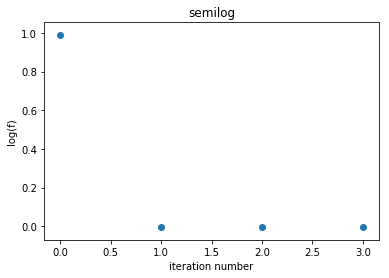

In [111]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(fminfstar[:len(fs) - 1])

plt.figure()
#plt.scatter(range(len(logf)), logf)
plt.scatter(range(len(fs)), fs)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()

# Начальная точка (0, 1, 0)

In [108]:
x0 = np.array([0., 1., 0.])
xs = []
fs = []
x = method(A, x0,3)

case quadr
gamma1 =  0.00999899010403
gamma2 =  1.0102030301
F2(gamma1) =  9904000301.09
F2(gamma2) =  -9.8919641903e-07
quadr gamma =  0.00999899010403
iter_num =  0
CURRENT X =  [-0.999949    0.01009946  0.        ]
NORM =  1.0
gamma1 =  0.50127530427
gamma2 =  -199.531471169
F2(gamma1) =  7.83961632164
F2(gamma2) =  -3.18660011797e-10
gamma1 =  0.00999899005327
gamma2 =  -199.511274431
F2(gamma1) =  0.00507395474966
F2(gamma2) =  -0.00124402135606
case quadr
gamma1 =  0.499914476417
gamma2 =  -199.511274418
F2(gamma1) =  5.15717307698e-13
F2(gamma2) =  -4872.51745896
quadr gamma =  0.499914476417
iter_num =  3
CURRENT X =  [-0.70885443  0.00708819 -0.70531919]
NORM =  1.0


In [109]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -0.00501224806908
x* =  [-0.70885443  0.00708819 -0.70531919]
norm check:  1.0


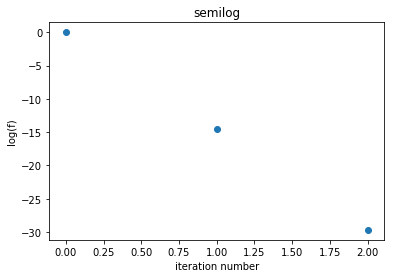

In [110]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(np.hstack((fminfstar[:np.argmin(fs)], fminfstar[np.argmin(fs) + 1:])))

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()

# Начальная точка (-1, 1, 3)

In [112]:
x0 = np.array([-1., 1., 3.])
xs = []
fs = []
x = method(A, x0, 1)

case quadr
gamma1 =  0.0100056123532
gamma2 =  0.628591175237
F2(gamma1) =  99348.7044934
F2(gamma2) =  -0.66498879362
quadr gamma =  0.0100056123532
iter_num =  0
CURRENT X =  [-0.31140392  0.00303203  0.9502728 ]
NORM =  1.0
case quadr
gamma1 =  0.497793290712
gamma2 =  21.1747386403
F2(gamma1) =  30.6580990701
F2(gamma2) =  -6.86669601969e-07
quadr gamma =  0.497793290712
iter_num =  1
CURRENT X =  [ 0.69912443  0.01578315  0.7148258 ]
NORM =  1.0
case quadr
gamma1 =  0.0100004218079
gamma2 =  -215.143281403
F2(gamma1) =  518.918705717
F2(gamma2) =  -8.9931639388e-09
quadr gamma =  0.0100004218079
iter_num =  2
CURRENT X =  [ 0.69927251 -0.00699369  0.71482099]
NORM =  1.0
case quadr
gamma1 =  0.497703691755
gamma2 =  -199.612316244
F2(gamma1) =  0.00145296977043
F2(gamma2) =  -1.74136318363e-06
quadr gamma =  0.497703691755
iter_num =  3
CURRENT X =  [ 0.70878836 -0.00692881  0.70538716]
NORM =  1.0
case quadr
gamma1 =  0.0100004215559
gamma2 =  -199.511977873
F2(gamma1) =  0.02519

In [113]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -0.00501224806908
x* =  [ 0.70885442 -0.00708818  0.7053192 ]
norm check:  1.0


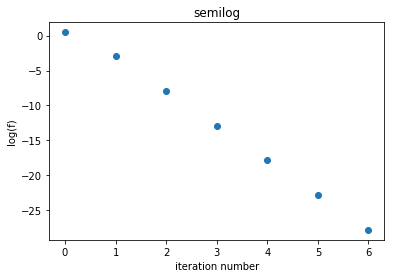

In [114]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(fminfstar[:len(fs) - 1])

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()

# Начальная точка (-1, -30, 3)

In [115]:
x0 = np.array([-1., -30., 3.])
xs = []
fs = []
x = method(A, x0, 2)

case quadr
gamma1 =  0.00999899861942
gamma2 =  0.702067378682
F2(gamma1) =  96547292.6779
F2(gamma2) =  -0.000438824918046
quadr gamma =  0.00999899861942
iter_num =  0
CURRENT X =  [-0.21763851  0.00230647  0.97602672]
NORM =  1.0
gamma1 =  0.501269166597
gamma2 =  -201.979563178
F2(gamma1) =  19.8394051831
F2(gamma2) =  -1.19935203779e-10
case quadr
gamma1 =  0.00999899249551
gamma2 =  -199.511304234
F2(gamma1) =  0.6125760794
F2(gamma2) =  -1.03041914717e-05
quadr gamma =  0.00999899249551
iter_num =  2
CURRENT X =  [ 0.70884078 -0.00708805  0.70533291]
NORM =  1.0
gamma1 =  0.501269336807
gamma2 =  -199.511274426
F2(gamma1) =  2.96532708783e-09
F2(gamma2) =  -0.842821808671
case quadr
gamma1 =  0.00999697626906
gamma2 =  -199.511274426
F2(gamma1) =  9.15741673132e-11
F2(gamma2) =  -68956.6889674
quadr gamma =  0.00999697626906
iter_num =  4
CURRENT X =  [ 0.70885443 -0.00708819  0.70531919]
NORM =  1.0


In [116]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -0.00501224806908
x* =  [ 0.70885443 -0.00708819  0.70531919]
norm check:  1.0


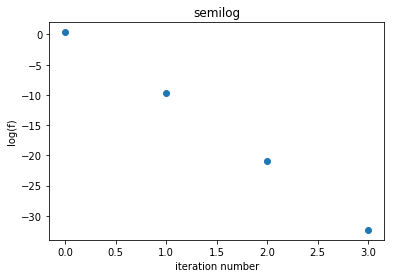

In [117]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(fminfstar[:len(fs) - 1])

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()

# Начальная точка (9, -30, 3)

In [118]:
x0 = np.array([9., -30., 3.])
xs = []
fs = []
x = method(A, x0, 2)

case quadr
gamma1 =  0.00999905930091
gamma2 =  2.53758252154
F2(gamma1) =  9406145.76995
F2(gamma2) =  -2.58475062004e-05
quadr gamma =  0.00999905930091
iter_num =  0
CURRENT X =  [ 0.94925471 -0.00953506  0.31436376]
NORM =  1.0
gamma1 =  0.501135493661
gamma2 =  -205.078033417
F2(gamma1) =  1.97468335611
F2(gamma2) =  -1.13447703046e-09
case quadr
gamma1 =  0.00999904570166
gamma2 =  -199.51275249
F2(gamma1) =  1.36030796518
F2(gamma2) =  -4.64001603152e-06
quadr gamma =  0.00999904570166
iter_num =  2
CURRENT X =  [ 0.70895052 -0.00708916  0.70522259]
NORM =  1.0
gamma1 =  0.50113549048
gamma2 =  -199.511274829
F2(gamma1) =  1.4707790066e-07
F2(gamma2) =  -0.0170017443742
case quadr
gamma1 =  0.00999904456723
gamma2 =  -199.511274426
F2(gamma1) =  1.01324624883e-07
F2(gamma2) =  -62.2952144832
quadr gamma =  0.00999904456723
iter_num =  4
CURRENT X =  [ 0.70885445 -0.00708819  0.70531916]
NORM =  1.0


In [119]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -0.00501224806908
x* =  [ 0.70885445 -0.00708819  0.70531916]
norm check:  1.0


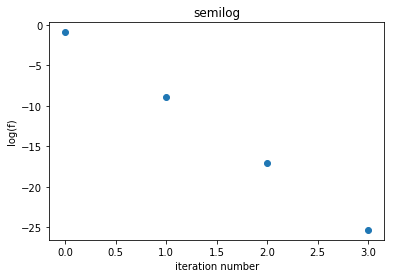

In [120]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(fminfstar[:len(fs) - 1])

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()